<center>
<h1> Linear Regression Case Study
</center>

#### Steps for Regression Modeling:
1. Business problem definition - One of major automobile company would like to design new product which can improve the sales. Inorder to define the product, they want to understand identify drivers for the sales(what are the factors driving sales) and Predicting sales of different car models given driving factors. 
2. convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. Data colletion(Y, X) - Identify the sources of information and collect the data
5. Consolidate the data - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. Data preparation for modeling (create data audit report to identify the steps to perform as part of data preparation)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


C:\Users\admin\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\admin\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\admin\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\admin\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
car_sales = pd.read_csv('Car_sales.csv')

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [5]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [7]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [8]:
car_sales.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [9]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [10]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [11]:
car_sales_num=car_sales._get_numeric_data()
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [12]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [13]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=car_sales_num.apply(lambda x: var_summary(x)).T

In [14]:
num_summary.to_csv('num_summary.csv')

In [15]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [16]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [17]:
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [18]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [19]:
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Ford 11 Dodge 11 Chevrolet ...,Neon 2 Cirrus 1 TL ...,Passenger 116 Car 41 Name: Vehicl...,10/30/2012 2 9/21/2011 2 4/24/2011 ...


In [20]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [21]:
car_sales['Sales_in_thousands'].quantile(0.01)

0.9372799999999999

In [22]:
car_sales['Sales_in_thousands'].clip_upper(260.65)

0       16.919
1       39.384
2       14.114
3        8.588
4       20.397
5       18.780
6        1.380
7       19.747
8        9.231
9       17.527
10      91.561
11      39.350
12      27.851
13      83.257
14      63.729
15      15.943
16       6.536
17      11.185
18      14.785
19     145.519
20     135.126
21      24.629
22      42.593
23      26.402
24      17.947
25      32.299
26      21.855
27     107.995
28       7.854
29      32.775
        ...   
127      9.191
128     12.115
129     80.620
130     24.546
131      5.223
132      8.472
133     49.989
134     47.107
135     33.028
136    142.535
137    247.994
138     63.849
139     33.269
140     84.087
141     65.119
142     25.106
143     68.411
144      9.835
145      9.761
146     83.721
147     51.102
148      9.569
149      5.596
150     49.463
151     16.957
152      3.545
153     15.245
154     17.531
155      3.493
156     18.969
Name: Sales_in_thousands, Length: 157, dtype: float64

In [23]:
#Handling Outliers - Method1
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_upper(car_sales['Sales_in_thousands'].quantile(0.99)) 
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_lower(car_sales['Sales_in_thousands'].quantile(0.01)) 


In [24]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,0.937280,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.173000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.231440,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.555000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.400000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.875000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.085000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.915000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.245400,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [25]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))

In [26]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8011.378448,51.027888,29.450000,57.397478,3294.470497,0.946643,0.950763,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,250.443296,253.560581
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.173000,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.231440,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.555000,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,96.400000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.875000,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.085000,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.915000,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.245400,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [27]:
#Handling Missings
# Fill with mean
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].fillna(car_sales['Sales_in_thousands'].median())

In [28]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8011.378448,51.027888,29.450000,57.397478,3294.470497,0.946643,0.950763,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,250.443296,253.560581
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.173000,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.231440,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.555000,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,96.400000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.875000,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.085000,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.915000,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.245400,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [29]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [30]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8011.378448,51.027888,29.450000,57.397478,3294.470497,0.946643,0.950763,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,250.443296,253.560581
four_year_resale_value,157.0,0.0,2690.901000,17.139497,14.180000,9.939494,98.793544,6.173000,6.874120,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,59.312800,60.220000
Price_in_thousands,157.0,0.0,4281.553480,27.271041,22.799000,13.982815,195.519110,10.231440,10.485434,12.491000,13.976200,18.145000,22.799000,31.930000,43.78800,55.225000,76.514312,78.479800
Engine_size,157.0,0.0,478.810000,3.049745,3.000000,0.979133,0.958702,1.555000,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29087.800000,185.272611,177.500000,52.650616,2772.087354,96.400000,98.416000,114.600000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,316.930000,325.750000
Wheelbase,157.0,0.0,16867.100000,107.433758,107.000000,7.400543,54.768036,92.875000,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.000000,71.165605,70.550000,3.379817,11.423163,66.085000,66.261400,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.840000,187.336561,187.900000,13.078309,171.042158,154.915000,156.250600,163.700000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,217.062200,219.305000
Curb_weight,157.0,0.0,530.454160,3.378689,3.342000,0.617780,0.381652,2.245400,2.247976,2.424000,2.612800,2.975000,3.342000,3.778000,4.11740,4.388400,5.394619,5.396680
Fuel_capacity,157.0,0.0,2817.100000,17.943312,17.200000,3.808060,14.501317,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [31]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [32]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([car_sales['Vehicle_type'], col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [33]:
car_sales_cat.head(5)

,Vehicle_type_Passenger
0,1
1,1
2,1
3,1
4,1


In [34]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [35]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [36]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [37]:
car_sales_cat.head(5)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

In [39]:
car_sales_new.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


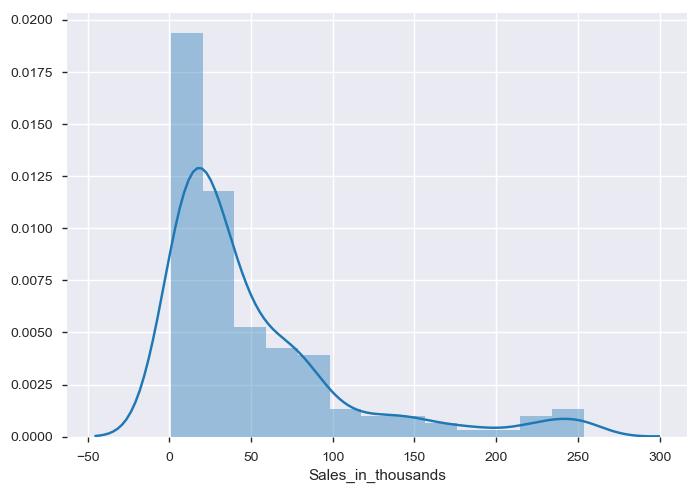

In [40]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

In [41]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)

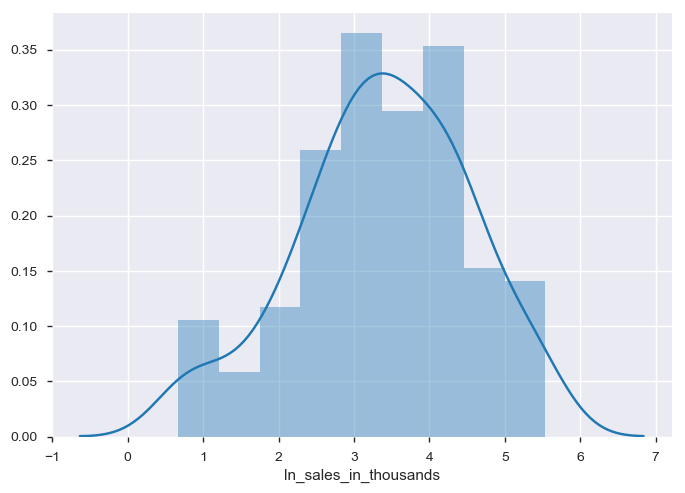

In [42]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [43]:
#Dropping the variables
car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [44]:
car_sales_new.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [45]:
# correlation matrix (ranges from 1 to -1)
car_sales_new.corr()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
four_year_resale_value,1.000000,0.793482,0.433034,0.650285,-0.040888,0.165259,0.040030,0.276207,0.268711,-0.341003,...,-0.065511,0.517804,-0.033931,-0.097963,-0.033931,-0.018848,-0.056776,-0.059543,0.084599,-0.437395
Price_in_thousands,0.793482,1.000000,0.617601,0.847967,0.118272,0.328579,0.157225,0.526211,0.431413,-0.507150,...,-0.061809,0.352504,0.019062,-0.169161,-0.047888,-0.093559,-0.136904,0.052376,0.044229,-0.566379
Engine_size,0.433034,0.617601,1.000000,0.814995,0.518433,0.702596,0.576364,0.793321,0.698313,-0.757120,...,0.078343,0.016720,-0.104716,-0.191354,-0.063982,-0.108018,-0.221204,-0.153125,-0.278720,-0.110096
Horsepower,0.650285,0.847967,0.814995,1.000000,0.325276,0.538193,0.420399,0.637164,0.526638,-0.610719,...,-0.001035,0.231530,-0.016823,-0.226951,-0.043878,-0.115615,-0.244750,-0.011797,-0.010312,-0.393764
Wheelbase,-0.040888,0.118272,0.518433,0.325276,1.000000,0.681390,0.837535,0.656884,0.659692,-0.498976,...,0.046376,-0.260791,-0.045175,-0.083439,-0.092140,-0.093985,-0.203574,-0.085580,-0.382446,0.268891
Width,0.165259,0.328579,0.702596,0.538193,0.681390,1.000000,0.700024,0.710129,0.648637,-0.584584,...,0.042466,-0.060717,-0.073017,-0.200565,-0.110105,-0.115409,-0.187300,-0.094605,-0.239476,0.044234
Length,0.040030,0.157225,0.576364,0.420399,0.837535,0.700024,1.000000,0.622352,0.561758,-0.418688,...,0.096536,-0.149922,-0.014260,-0.061445,-0.059569,-0.103678,-0.304586,-0.059173,-0.130166,0.207622
Curb_weight,0.276207,0.526211,0.793321,0.637164,0.656884,0.710129,0.622352,1.000000,0.868023,-0.829389,...,0.007816,-0.094518,-0.044951,-0.221330,-0.020049,-0.070576,-0.161803,-0.030435,-0.518975,-0.056614
Fuel_capacity,0.268711,0.431413,0.698313,0.526638,0.659692,0.648637,0.561758,0.868023,1.000000,-0.821330,...,-0.001399,-0.034685,-0.007281,-0.260082,-0.046183,-0.011476,-0.170318,-0.005775,-0.592574,-0.018837
Fuel_efficiency,-0.341003,-0.507150,-0.757120,-0.610719,-0.498976,-0.584584,-0.418688,-0.829389,-0.821330,1.000000,...,0.053712,-0.062668,-0.022199,0.304881,0.021007,0.090764,0.121107,0.036863,0.597855,0.129117


In [46]:
corr_matrix=car_sales_new.corr()

In [47]:
corr_matrix.to_csv('corr_matrix.csv')

In [48]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'Interval',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'Panel',
 'Panel4D',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseList',
 'SparseSeries',
 'Term',
 'TimeGrouper',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt64Index',
 'WidePanel',
 '_DeprecatedModule',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p12',
 '_np_version_under1p13',
 '_np_version_under1p14',
 '_np_version_under1p8',
 '_np_version_under1p9',
 '_tslib',
 '_version',
 'api',
 'bdate_range',
 'compat',
 'concat',
 'core',
 'crosstab',
 'cut',

In [49]:
pd.to_csv(corr_matrix, 'corr_matrix.csv')

AttributeError: module 'pandas' has no attribute 'to_csv'

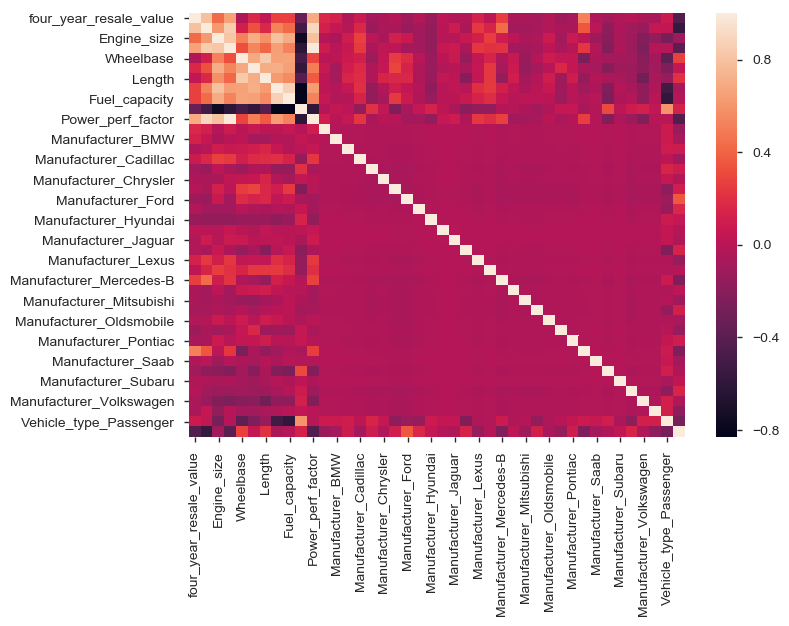

In [50]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

#### What relationships do you notice?

In [51]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands'] )
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [52]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [54]:
train, test = train_test_split( car_sales_new,
                                test_size = 0.3,
                                random_state = 123 )

In [55]:
train.head()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
45,12.025,19.565,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,...,0,0,0,0,0,0,0,0,0,5.208114
129,9.200,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,...,0,0,0,1,0,0,0,0,1,4.402074
79,8.325,13.987,1.8,113.0,98.4,66.5,173.6,2.250,13.2,30.0,...,0,0,0,0,0,0,0,0,1,3.304393
153,14.180,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,...,0,0,0,0,0,0,0,1,1,2.787785
35,7.750,12.640,2.0,132.0,105.0,74.4,174.4,2.567,12.5,29.0,...,0,0,0,0,0,0,0,0,1,4.344247


In [53]:
print(len( train_X ))
print(len( test_X))

109
48


## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

## Method-1

In [ ]:
import statsmodels.api as sm

In [ ]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [ ]:
print(lm.summary())

In [ ]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

In [ ]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

## Method-2

In [57]:
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [58]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sa

In [59]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands'] ))

print(all_columns)



Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [60]:
my_formula = "ln_sales_in_thousands~" + all_columns

print(my_formula)

ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [63]:
smf.ols?

In [61]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()
#lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [72]:
lm=smf.ols(formula='ln_sales_in_thousands~Curb_weight+Fuel_capacity+Fuel_efficiency+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value',data=train).fit()

In [73]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.776
Model:                               OLS   Adj. R-squared:                  0.665
Method:                    Least Squares   F-statistic:                     6.948
Date:                   Sat, 31 Mar 2018   Prob (F-statistic):           1.89e-12
Time:                           15:04:09   Log-Likelihood:                -90.703
No. Observations:                    109   AIC:                             255.4
Df Residuals:                         72   BIC:                             355.0
Df Model:                             36                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.0072      3.045     -1.973      0.052     -12.077       0.062
Curb_weight                 0.7437      0.386      1.928      0.058      -0.025       1.513
Fuel_capacity              -0.1270      0.058     -2.191      0.032      -0.243      -0.011
Fuel_efficiency             0.1152      0.050      2.324      0.023       0.016       0.214
Manufacturer_Audi          -0.2010      0.864     -0.233      0.817      -1.923       1.521
Manufacturer_BMW            0.3590      0.816      0.440      0.661      -1.268       1.986
Manufacturer_Buick          0.9214      0.580      1.588      0.117      -0.235       2.078
Manufacturer_Cadillac       0.7925      0.551      1.439      0.154      -0.305       1.890
Manufacturer_Chevrolet      0.7104      0.525      1.354      0.180      -0.336       1.757
Manufacturer_Chrysler      -0.0632      0.607     -0.104      0.917      -1.273       1.146
Manufacturer_Dodge          1.2911      0.569      2.267      0.026       0.156       2.426
Manufacturer_Ford           1.8137      0.510      3.559      0.001       0.798       2.830
Manufacturer_Honda          2.1004      0.668      3.147      0.002       0.770       3.431
Manufacturer_Hyundai        1.0106      0.680      1.487      0.141      -0.344       2.366
Manufacturer_Infiniti    -1.07e-14   7.69e-15     -1.392      0.168    -2.6e-14    4.63e-15
Manufacturer_Jaguar         0.6448      0.846      0.762      0.449      -1.042       2.332
Manufacturer_Jeep           2.6272      0.723      3.634      0.001       1.186       4.069
Manufacturer_Lexus          0.7947      0.545      1.459      0.149      -0.291       1.881
Manufacturer_Lincoln        0.9630      0.607      1.586      0.117      -0.248       2.174
Manufacturer_MercedesB      0.5954      0.522      1.140      0.258      -0.446       1.636
Manufacturer_Mercury        0.5858      0.621      0.944      0.348      -0.651       1.823
Manufacturer_Mitsubishi     0.5983      0.542      1.104      0.273      -0.482       1.679
Manufacturer_Nissan         1.5957      0.559      2.853      0.006       0.481       2.711
Manufacturer_Oldsmobile     0.2335      0.542      0.431      0.668      -0.847       1.314
Manufacturer_Plymouth      -1.1812      1.018     -1.160      0.250      -3.212       0.849
Manufacturer_Pontiac        0.8685      0.527      1.647      0.104      -0.183       1.920
Manufacturer_Porsche        1.4643      0.783      1.869      0.066      -0.097       3.026
Manufacturer_Saab       -1.779e-16   2.04e-16     -0.871      0.387   -5.85e-16    2.29e-16
Manufacturer_Saturn        -0.2020      0.596     -0.339      0.735      -1.389       0.985
Manufacturer_Subaru         0.7461      0.878      0.850      0.398      -1.004       2.497
Manufacturer_T

In [ ]:
test.head(5)

In [ ]:
test.columns

In [74]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sa

In [76]:
test.head()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
24,36.225,45.705,5.7,325.75,104.5,73.6,179.7,3.210,19.1,22.0,...,0,0,0,0,0,0,0,0,1,2.941646
23,13.025,24.340,3.8,200.00,101.1,74.1,193.2,3.500,16.8,25.0,...,0,0,0,0,0,0,0,0,1,3.310616
138,18.140,25.545,3.0,210.00,107.1,71.7,191.9,3.417,18.5,26.0,...,0,0,0,0,0,1,0,0,1,4.172061
87,13.890,16.540,2.0,125.00,106.4,69.6,185.0,2.892,16.0,30.0,...,0,0,0,0,0,0,0,0,1,3.315240
134,14.180,22.695,2.5,165.00,103.5,67.5,185.8,3.415,16.9,25.0,...,0,0,0,0,1,0,0,0,1,3.873428


In [83]:
pred = lm.predict(test)
pred.head(5)

24     2.285941
23     3.198044
138    4.069456
87     3.918007
134    3.429052
dtype: float64

In [84]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, pred)))
#print('R-Squre:', metrics.r2_score(test.ln_sales_in_thousands, pred))

MAE: 0.759277738597
MSE: 0.872320706358
RMSE: 0.933981105996


In [85]:
np.corrcoef(test.ln_sales_in_thousands, pred)

array([[ 1.        ,  0.61911915],
       [ 0.61911915,  1.        ]])

In [79]:
pred = lm.predict(train)
pred.head(5)

45     4.663013
129    3.480887
79     3.303831
153    2.606390
35     4.672318
dtype: float64

In [80]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, pred)))
#print('R-Squre:', metrics.r2_score(train.ln_sales_in_thousands, pred))

MAE: 0.442833366227
MSE: 0.309249217763
RMSE: 0.556101805214
R-Squre: 0.776483880472


In [82]:
np.corrcoef(train.ln_sales_in_thousands, pred)

array([[ 1.        ,  0.88118323],
       [ 0.88118323,  1.        ]])

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> - R-squared = Explained variation / Total variation <br>
> - Total variation is variation of response variable around it's mean. <br>

> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. <br>

## Other Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [86]:
import statsmodels as sm

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [108]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Wheelbase+Width+Vehicle_type_Passenger', train, return_type='dataframe')

In [109]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [110]:
vif.round(1)

,VIF Factor,features
0,825.4,Intercept
1,3.4,Price_in_thousands
2,2.6,four_year_resale_value
3,3.7,Engine_size
4,2.2,Wheelbase
5,3.1,Width
6,1.4,Vehicle_type_Passenger


In [ ]:
X.head(5)

In [112]:
lm1=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Vehicle_type_Passenger+Wheelbase', train).fit()

In [113]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.546
Model:                               OLS   Adj. R-squared:                  0.528
Method:                    Least Squares   F-statistic:                     31.22
Date:                   Sat, 31 Mar 2018   Prob (F-statistic):           4.50e-17
Time:                           16:00:29   Log-Likelihood:                -129.37
No. Observations:                    109   AIC:                             268.7
Df Residuals:                        104   BIC:                             282.2
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3964      1.263      0.314      0.754      -2.107       2.900
Price_in_thousands        -0.0622      0.007     -8.443      0.000      -0.077      -0.048
Engine_size                0.1599      0.126      1.271      0.207      -0.090       0.409
Vehicle_type_Passenger    -0.3008      0.196     -1.534      0.128      -0.690       0.088
Wheelbase                  0.0420      0.013      3.337      0.001       0.017       0.067
==============================================================================
Omnibus:                        2.069   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.560
Skew:                          -0.269   Prob(JB):                        0.458
Kurtosis:                       3.232   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
train['y_pred_train'] = lm1.predict(train)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, train.y_pred_train))
print('MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train)))

In [ ]:
test['y_pred_test'] = lm1.predict(test)

In [ ]:
test.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, test.y_pred_test))
print('MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test)))

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [ ]:
train['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

In [ ]:
train.head(5)

In [ ]:
test.head(5)

In [ ]:
train[['Deciles','ln_sales_in_thousands', 'y_pred_train']].groupby(train.Deciles).mean()

In [ ]:
test[['Deciles','ln_sales_in_thousands', 'y_pred_test']].groupby(test.Deciles).mean()

In [ ]:
sns.distplot(lm1.resid)

In [ ]:
sns.jointplot(car_sales_new.ln_sales_in_thousands, lm1.predict(car_sales_new) )

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [ ]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

In [ ]:
linreg.coef_

In [ ]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
print(metrics.r2_score( train_y, y_pred_t ))

In [ ]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

In [ ]:
residuals = train_y - y_pred_t

In [ ]:
sns.jointplot(  train_y, residuals )

In [ ]:
sns.distplot( residuals )

In [ ]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [ ]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [ ]:
linreg = LinearRegression()

In [ ]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

In [ ]:
cross_val_score?

In [ ]:
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

In [ ]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [ ]:
F_values, p_values  = f_regression(  train_X, train_y )

In [ ]:
F_values

In [ ]:
['%.3f' % p for p in p_values]

As p - values are less than 5% - the variables are siginificant in the regression equation.

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions